## Thesis Notebook
This notebook contains all the graphs/ configuration of plots for the thesis such that they can be easily modified and changed if the style is not fitting
The model will not be trained here, only the graphs will be opened/ the model weights loadad

In [1]:
# For reloading modules
import importlib

# My modules config has to be imported first
import config as cfg
import datasets
import utils
import models
import train
import tester
import display as disp

import time
import datetime
import tensorflow as tf
import numpy as np

# Video and visualization stuff
import tqdm
import PIL.Image, PIL.ImageDraw

from IPython.display import Image, HTML, clear_output, Video
import moviepy.editor as mvp
from moviepy.video.io.ffmpeg_writer import FFMPEG_VideoWriter

import plotly 
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt
from visdom import Visdom

# For this notebook
import textwrap


In [2]:
bg_layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')

In [2]:
data_class = datasets.get_dataset_class()
data, data_seperator = data_class.dataset, data_class.seperator
model = models.get_model(None)
trainer = train.get_trainer()(data["train"], data["val"], model, None, data_seperator)

path = "models/2021/THESIS/faces_50_10k/nca/"
trainer.load_weights(path + "model")

Creating Emoji Dataset


In [3]:
img = data["train"]["x"][0,:,:,:4]

def plot_as_rgba(img):
  img_r = np.zeros((40,40,3))
  img_g = np.zeros((40,40,3))
  img_b = np.zeros((40,40,3))
  img_a = np.zeros((40,40,1))
  img_r[:,:,:1] = img[:,:,:1]
  img_g[:,:,1:2] = img[:,:,1:2]
  img_b[:,:,2:3] = img[:,:,2:3]
  img_a = img[:,:,3:4]
  plt.imshow(img_r)
  plt.axis('off')
  plt.show()
  plt.imshow(img_g)
  plt.axis('off')
  plt.show()
  plt.imshow(img_b)
  plt.axis('off')
  plt.show()
  plt.imshow(img_a, cmap="gray")
  plt.axis('off')
  plt.show()


In [23]:
img = data["train"]["x"][220,:,:,:4]
# plt.imshow(img[:,:,:3])
# plt.show()

def show_layer(img, layer):
  plt.imshow(img[:,:,layer:layer+1], cmap="gray")
  plt.axis('off')
  plt.show()
  
%matplotlib qt
# plt.rcParams['figure.figsize'] = [16, 16]
out = []
x = data["train"]["x"][220]
x = x[None, :]
for i in range(36):
  x = trainer.ca(x)
  # if i in [3,20]:
  # if i%3 == 0:
  out.append(x)

print(len(out))


for i, img in enumerate(out):
  plt.subplot(6,6,i+1)
  plt.axis('off')
  img = np.clip(img, 0,1)
  plt.imshow(img[0][:,:,:3])

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()
assert False
out_1 = np.clip(out[0][0], 0, 1)
step_t = out_1[:,:,:4]
plt.imshow(step_t[:,:,:3])
plt.axis('off')
plt.show()

plot_as_rgba(step_t)
for i in range(1):
  show_layer(out_1, 4 + i)
  
out_2 = np.clip(out[1][0], 0, 1)
step_t_1 = out_2[:,:,:4]
plt.imshow(step_t_1[:,:,:3])
plt.axis('off')
plt.show()

# plt.imshow(out[1][0,:,:,:3])
# plt.axis('off')
# plt.show()

36


AssertionError: 

(40, 40, 1)

In [3]:
# Open a cfg file by path:
path = "models/2021/num_emojis/50/"
utils.open_cfg_from_path(path)

[{'CA_STEP_RANGE': [50, 60],
  'CELL_FIRE_RATE': 1,
  'ENV_SIZE': 0,
  'LIVING_MASK': True,
  'set_params': <bound method _ConfigModule.set_params of <config._World object at 0x7fba0cf27190>>},
 {'BINARY_NOISE': True,
  'BINARY_X': True,
  'CLIP_NOISE': True,
  'DAMAGE': 0,
  'DISC_INPUT_NOISE': False,
  'EDGE_DETECTION': 'CANNY',
  'ENVIRONMENT_INFORMATION': None,
  'GANCA_GEN_NOISE': False,
  'GANCA_NORM_INPUT': False,
  'GRID_SIZE': 40,
  'NAME': 'EMOJI',
  'NOISE': 0.4,
  'ONLY_POS_NOISE': False,
  'SEED': 'EDGES',
  'SUPERPIXEL_COLOR': False,
  'SUPERPIXEL_FIXED': False,
  'TARGETS': 50,
  'TARGET_SIZE': 32,
  'TEST_SIZE': 200,
  'TRAIN_SIZE': 1000,
  'VAL_SIZE': 100,
  'post_process': <bound method _Dataset.post_process of <config._Dataset object at 0x7fba0c6c5160>>,
  'set_params': <bound method _ConfigModule.set_params of <config._Dataset object at 0x7fba0c6c5160>>},
 {'BATCH_NORM': False,
  'CHANNEL_N': 16,
  'DISC_LR': 0.0001,
  'DISC_SIZE': 128,
  'FLOATX': 'float32',
  'GAN

In [9]:
# Reset gate with sigmoid activation function
path = "models/2021/reset_gate/sig/"

# trainer.load_weights(path + "/model")
fig_json = utils.read_json(path + "fig.json")
fig = go.Figure(fig_json)
fig.show()

In [4]:
utils.save_fig(fig, name=f"reset_gate_sigmoid", as_img=True, path="../../imgs/")

Successfully saved figure at:  ../../imgs/reset_gate_sigmoid.png


In [15]:
# load single NCA training performance on nature dataset:

# path = "models/2021/THESIS/ganca/good_1/"
path = "models/2021/THESIS/nature_50_10k/"

color_arr = plotly.colors.DEFAULT_PLOTLY_COLORS

# trainer.load_weights(path + "/model")
# names = ["Discriminator real", "Discriminator fake", "Generator"]
fig = go.Figure(layout=bg_layout)
fig.update_layout(font_size=28)

fig_json = utils.read_json(path + "fig.json")

raw_loss = fig_json["data"][0]["y"]
smoothed_y = disp.smooth(raw_loss, weight=0.99)
raw = go.Scatter(y=raw_loss, opacity=0.1, marker_color=color_arr[0], showlegend=False)
smoothed_plot = go.Scatter(y=smoothed_y, name="Train", marker_color=color_arr[0], line_width=4)
fig.add_trace(raw)
fig.add_trace(smoothed_plot)

raw_val = fig_json["data"][2]["y"]
smoothed_val = disp.smooth(raw_val, weight=0.6)
x_val = np.arange(0, 10000, 50)
raw = go.Scatter(y=raw_val, x=x_val, opacity=0.1, marker_color=color_arr[1], showlegend=False)
smoothed_plot = go.Scatter(y=smoothed_val, x=x_val, name="Validation", marker_color=color_arr[1], line_width=4)
fig.add_trace(raw)
fig.add_trace(smoothed_plot)

# Layout positioning
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))

fig.update_layout(width=800)
fig.update_xaxes(title="Number of steps",
                 tickmode="array",
                 tickvals=[0,2000,4000,6000, 8000, 9999],
                 ticktext=[0,2000,4000,6000, 8000, 10000],
                gridcolor="lightgray",
                linecolor="black")
fig.update_yaxes(title="Loss", range=(0,200), 
                gridcolor="lightgray",
                linecolor="black")
fig.show()


utils.save_fig(fig, name=f"nature_50_loss", as_pdf=True, path="../../imgs/plots/")

Successfully saved figure at:  ../../imgs/plots/nature_50_loss.pdf


In [17]:
# load single ganca graph:

path = "models/2021/THESIS/ganca/good_1/"
# path = "models/2021/THESIS/ganca/first_ganca/"

color_arr = plotly.colors.DEFAULT_PLOTLY_COLORS

# trainer.load_weights(path + "/model")
names = ["Discriminator real", "Discriminator fake", "Generator"]
fig = go.Figure(layout=bg_layout)
fig.update_layout(font_size=28)

fig_json = utils.read_json(path + "_fig.json")

for i, name in enumerate(names):
  raw_loss = fig_json["data"][i]["y"]
  smoothed_y = disp.smooth(raw_loss, weight=0.98)
  raw = go.Scatter(y=raw_loss, name=name, opacity=0.2, marker_color=color_arr[i], showlegend=False)
  fig.add_trace(raw)
  smoothed_plot = go.Scatter(y=smoothed_y, name=name, marker_color=color_arr[i], line_width=4)
  fig.add_trace(smoothed_plot)

# Layout positioning
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.1
))

fig.update_layout(width=800)
fig.update_xaxes(title="Number of steps",
                 tickmode="array",
                 tickvals=[0,1000,2000,2999],
                ticktext=[0,1000,2000,3000],gridcolor="lightgray",
                linecolor="black")
fig.update_yaxes(title="Loss", range=(0,2),gridcolor="lightgray",
                linecolor="black")
fig.show()


# utils.save_fig(fig, name=f"bad_ganca_loss", as_pdf=True, path="../../imgs/plots/")
utils.save_fig(fig, name=f"good_ganca_loss", as_pdf=True, path="../../imgs/plots/")

Successfully saved figure at:  ../../imgs/plots/good_ganca_loss.pdf


In [18]:
""" --- SUPERPIXEL INFORMATION JOINED GRAPH --- """ 

paths = ["models/2021/THESIS/faces_50_super/super_10/5k/",
        "models/2021/THESIS/faces_50_super/super_20/5k/",
        "models/2021/THESIS/faces_50_super/super_50/5k/"]
names = ["10", "20", "50"]
fig_name = "fig"

fig = go.Figure(layout=bg_layout)
color_arr = plotly.colors.DEFAULT_PLOTLY_COLORS

fig.update_layout(font_size=28)
# [train, train_smoothed, mean_val]
data_idx = 2

for idx, path in enumerate(paths):
  figs = utils.get_all_figs_by_path(path, fig_name)
  # print([dat["name"] for dat in figs[0]["data"]])
  mean_plot, std_plot = disp.avg_plot(figs, data_idx, names[idx], showlegend=True, color=color_arr[idx])
  smoothed_mean = disp.smooth(mean_plot.y, 0.6)
  smoothed_plot = go.Scatter(y=smoothed_mean, name=names[idx], marker_color=color_arr[idx], line_width=4)
  fig.add_trace(smoothed_plot)
  
  raw_plot = go.Scatter(y=mean_plot.y, showlegend=False, marker_color=color_arr[idx], opacity=0.2)
  fig.add_trace(raw_plot)
  # fig.add_trace(std_plot)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 20, 40, 60, 80, 99],
        ticktext = [0, 1000, 2000, 3000, 4000, 5000]
    )
)
fig.update_layout(legend=dict(
  title="#Super",
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))


fig.update_yaxes(title="Validation loss")
fig.update_xaxes(title="Number of steps",gridcolor="lightgray",
                linecolor="black")
fig.update_yaxes(range=(0,200),gridcolor="lightgray",
                linecolor="black")

fig.update_layout(width=800, height=500)

fig.show()

utils.save_fig(fig, name=f"val_score_amount_superpixel", as_pdf=True, path="../../imgs/plots/")

Successfully saved figure at:  ../../imgs/plots/val_score_amount_superpixel.pdf


In [20]:
""" --- 300 PEOPLE JOINED GRAPH --- """ 

paths = ["models/2021/THESIS/people_300/no_super/10k/",
        "models/2021/THESIS/people_300/super_50/10k/"]
names = ["0", "50"]
fig_name = "fig"

fig = go.Figure(layout=bg_layout)
color_arr = plotly.colors.DEFAULT_PLOTLY_COLORS
fig.update_layout(font_size=28)

data_idx = 2

for idx, path in enumerate(paths):
  figs = utils.get_all_figs_by_path(path, fig_name)
  # print([dat["name"] for dat in figs[0]["data"]])
  mean_plot, std_plot = disp.avg_plot(figs, data_idx, names[idx], showlegend=True, color=color_arr[idx])
  smooth_mean = disp.smooth(mean_plot.y, weight=0.6)
  smoothed_plot = go.Scatter(y=smooth_mean, name=names[idx], marker_color=color_arr[idx], line_width=4)
  fig.add_trace(smoothed_plot)
  
  raw_data = go.Scatter(y=mean_plot.y, marker_color=color_arr[idx], opacity=0.2, showlegend=False)
  fig.add_trace(raw_data)

# print([str(val) for val in np.arange(0,5000,500)])
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 40, 80, 120, 160, 199],
        ticktext = [0, 2000, 4000, 6000, 8000, 10000]
    )
)
fig.update_layout(legend=dict(
  title="#Super",
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))


fig.update_yaxes(title="Validation loss")
fig.update_xaxes(title="Number of steps",gridcolor="lightgray",
                linecolor="black")
fig.update_yaxes(range=(0,200),gridcolor="lightgray",
                linecolor="black")

fig.update_layout(width=800, height=500)

fig.show()
utils.save_fig(fig, name=f"val_loss_300_people", as_pdf=True, path="../../imgs/plots/")

Successfully saved figure at:  ../../imgs/plots/val_loss_300_people.pdf


In [21]:
""" ---- BASIC NCA CHANNEL_N EXPERIMENT ----"""

import textwrap

paths = ["models/2021/experiments/nca_basic/hfs_128_cn_4_hl_0/",
         "models/2021/experiments/nca_basic/hfs_128_cn_8_hl_0/",
         "models/2021/experiments/nca_basic/hfs_128_cn_16_hl_0/",
        "models/2021/experiments/nca_basic/hfs_128_cn_128_hl_0/"]
names = ["4", "8", "16", "128"]
fig_name = "fig"

fig = go.Figure(layout=bg_layout)
color_arr = plotly.colors.DEFAULT_PLOTLY_COLORS
fig.update_layout(font_size=28)

for idx, path in enumerate(paths):
  figs = utils.get_all_figs_by_path(path, fig_name)
  mean_plot, std_plot = disp.avg_plot(figs, 0, names[idx], showlegend=True, color=color_arr[idx])
  # smoothed_mean = disp.smooth(mean_plot, weight=0.99)
  smooth_mean = disp.smooth(mean_plot.y, weight=0.96)
  smoothed_plot = go.Scatter(y=smooth_mean, name=names[idx], marker_color=color_arr[idx], line_width=4)
  fig.add_trace(smoothed_plot)
  
  raw_plot = go.Scatter(y=mean_plot.y, showlegend=False, marker_color=color_arr[idx], opacity=0.2)
  fig.add_trace(raw_plot)
  # fig.add_trace(mean_plot)
  # fig.add_trace(std_plot, showlegend=False)
  
fig.layout.title.font.size = 16


fig.update_layout(legend=dict(
  title="Depth",
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))

fig.update_layout(width=1200)
fig.update_xaxes(title="Number of steps",
                tickmode="array",
                tickvals=[0,1000,2000,3000,4000,4999],
               ticktext=[0,1000, 2000,3000,4000,5000],gridcolor="lightgray",
                linecolor="black")
fig.update_yaxes(title="L2 loss", range=(0,200),gridcolor="lightgray",
                linecolor="black")


fig.show()
utils.save_fig(fig, name="basic_nca_channel_n_exp", path="../../imgs/plots/", as_pdf=True)

Successfully saved figure at:  ../../imgs/plots/basic_nca_channel_n_exp.pdf


In [22]:
""" --- RATIONAL VS NO RATIONAL --- """

# path = "models/2021/THESIS/ganca/good_1/"
path = "models/2021/rationals/mc_faces_2_5k_no_rationals/"
path_rat = "models/2021/rationals/mc_faces_2_5k/"

color_arr = plotly.colors.DEFAULT_PLOTLY_COLORS

# trainer.load_weights(path + "/model")
# names = ["Discriminator real", "Discriminator fake", "Generator"]
fig = go.Figure(layout=bg_layout)
fig.update_layout(font_size=28)

fig_json = utils.read_json(path + "fig.json")

raw_loss = fig_json["data"][0]["y"]
smoothed_y = disp.smooth(raw_loss, weight=0.98)
raw = go.Scatter(y=raw_loss, opacity=0.2, marker_color=color_arr[0], showlegend=False)
smoothed_plot = go.Scatter(y=smoothed_y, name="Baseline", marker_color=color_arr[0], line_width=4)
fig.add_trace(raw)
fig.add_trace(smoothed_plot)

raw_val = fig_json["data"][2]["y"]
smoothed_val = disp.smooth(raw_val, weight=0.6)
x_val = np.arange(0, 10000, 50)
raw = go.Scatter(y=raw_val, x=x_val, opacity=0.2, marker_color=color_arr[1], showlegend=False)
smoothed_plot = go.Scatter(y=smoothed_val, x=x_val, name="Validation", marker_color=color_arr[1], line_width=4)
#fig.add_trace(raw)
#fig.add_trace(smoothed_plot)


# path_rat
fig_json = utils.read_json(path_rat + "fig.json")
raw_loss = fig_json["data"][0]["y"]
smoothed_y = disp.smooth(raw_loss, weight=0.98)
raw = go.Scatter(y=raw_loss, opacity=0.2, marker_color=color_arr[2], showlegend=False)
smoothed_plot = go.Scatter(y=smoothed_y, name="Rational", marker_color=color_arr[2], line_width=4)
fig.add_trace(raw)
fig.add_trace(smoothed_plot)

raw_val = fig_json["data"][2]["y"]
smoothed_val = disp.smooth(raw_val, weight=0.6)
x_val = np.arange(0, 10000, 50)
raw = go.Scatter(y=raw_val, x=x_val, opacity=0.2, marker_color=color_arr[3], showlegend=False)
smoothed_plot = go.Scatter(y=smoothed_val, x=x_val, name="Validation_rat", marker_color=color_arr[3], line_width=4)
#fig.add_trace(raw)
#fig.add_trace(smoothed_plot)


# Layout positioning
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))

fig.update_layout(width=800)
fig.update_xaxes(title="Number of steps",
                 tickmode="array",
                 tickvals=[0,1000,2000],
                 ticktext=[0,1000, 2000],gridcolor="lightgray",
                linecolor="black")
fig.update_yaxes(title="Training loss", range=(0,200),gridcolor="lightgray",
                linecolor="black")
fig.show()

utils.save_fig(fig, name="rational_loss", path="../../imgs/plots/", as_pdf=True)

Successfully saved figure at:  ../../imgs/plots/rational_loss.pdf


In [17]:
from visdom import Visdom
vis = Visdom()
vis.plotlyplot(fig)

Setting up a new session...


'window_397b3b649d678a'

Creating Emoji Dataset
0
microsoft/womans-hat_1f452_EDGES (40, 40, 16) (40, 40, 4)
(0, 34.934375, 185)


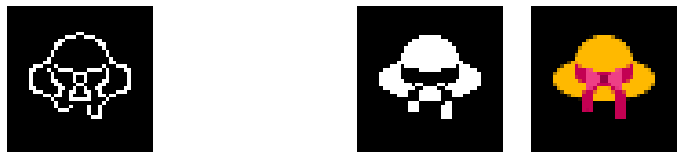

microsoft/genie_1f9de_EDGES (40, 40, 16) (40, 40, 4)
(0, 28.83125, 199)


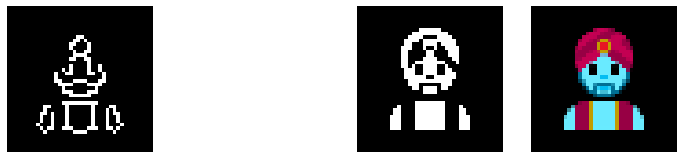

microsoft/female-sleuth_1f575-fe0f-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 43.4375, 243)


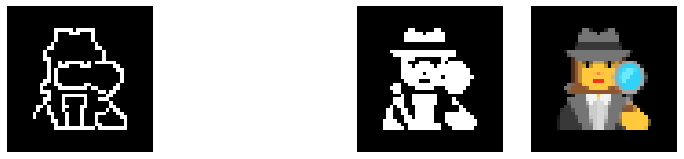

microsoft/man-in-business-suit-levitating_1f574_EDGES (40, 40, 16) (40, 40, 4)
(0, 11.406875, 255)


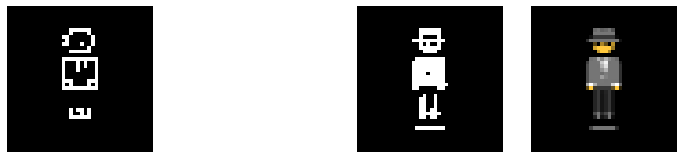

microsoft/japanese-goblin_1f47a_EDGES (40, 40, 16) (40, 40, 4)
(0, 34.41625, 255)


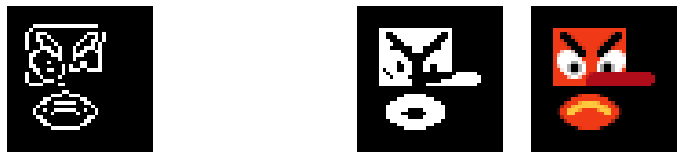

microsoft/kissing-face_1f617_EDGES (40, 40, 16) (40, 40, 4)
(0, 72.94125, 201)


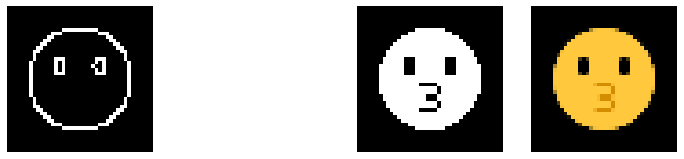

microsoft/family-woman-girl_1f469-200d-1f467_EDGES (40, 40, 16) (40, 40, 4)
(0, 17.236875, 201)


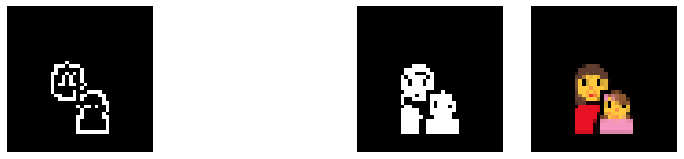

microsoft/woman-white-haired_1f469-200d-1f9b3_EDGES (40, 40, 16) (40, 40, 4)
(0, 89.65, 243)


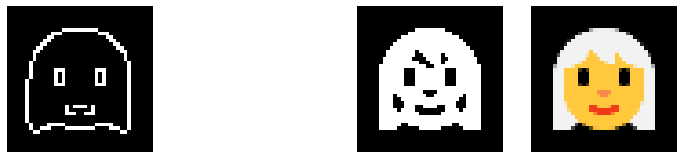

microsoft/skull_1f480_EDGES (40, 40, 16) (40, 40, 4)
(0, 61.81125, 244)


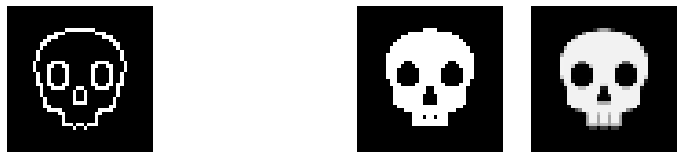

microsoft/older-woman_1f475_EDGES (40, 40, 16) (40, 40, 4)
(0, 80.13625, 244)


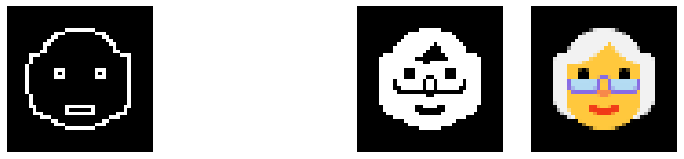

microsoft/dark-sunglasses_1f576_EDGES (40, 40, 16) (40, 40, 4)
(0, 11.519375, 205)


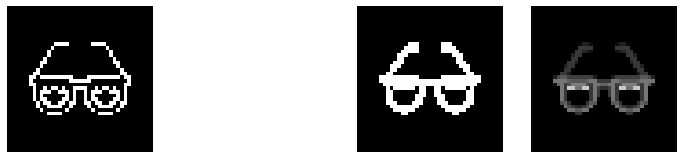

microsoft/male-guard_1f482-200d-2642-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 23.0925, 201)


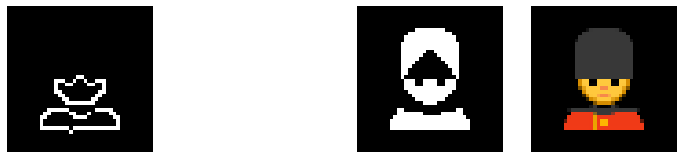

microsoft/disappointed-but-relieved-face_1f625_EDGES (40, 40, 16) (40, 40, 4)
(0, 69.5475, 201)


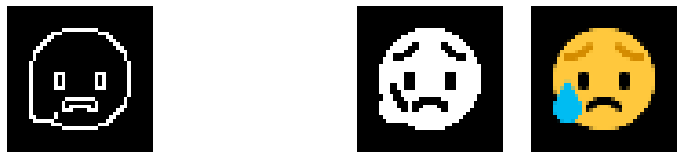

microsoft/woman-vampire_1f9db-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 28.84, 255)


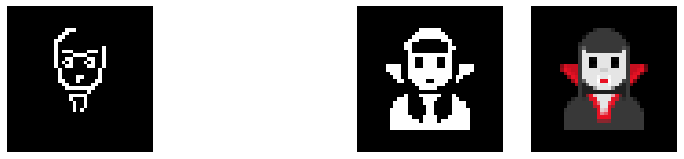

microsoft/face-with-uneven-eyes-and-wavy-mouth_1f974_EDGES (40, 40, 16) (40, 40, 4)
(0, 64.718125, 201)


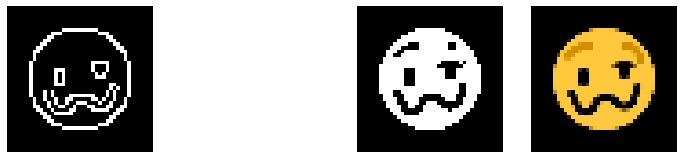

microsoft/male-mechanic_1f468-200d-1f527_EDGES (40, 40, 16) (40, 40, 4)
(0, 41.27875, 205)


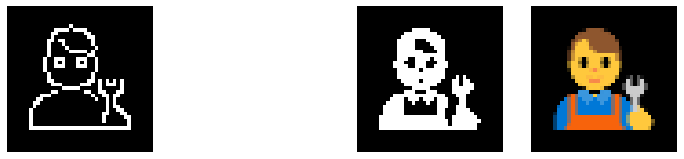

microsoft/older-adult_1f9d3_EDGES (40, 40, 16) (40, 40, 4)
(0, 71.068125, 244)


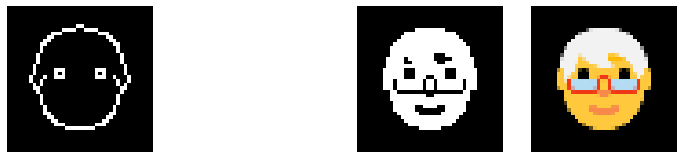

microsoft/person-in-steamy-room_1f9d6_EDGES (40, 40, 16) (40, 40, 4)
(0, 54.60375, 244)


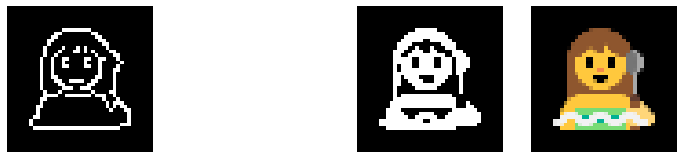

microsoft/thinking-face_1f914_EDGES (40, 40, 16) (40, 40, 4)
(0, 68.06, 201)


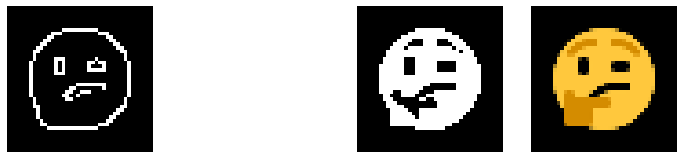

microsoft/female-artist_1f469-200d-1f3a8_EDGES (40, 40, 16) (40, 40, 4)
(0, 43.64375, 207)


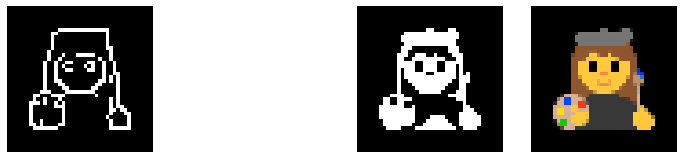

microsoft/flexed-biceps_1f4aa_EDGES (40, 40, 16) (40, 40, 4)
(0, 50.865625, 201)


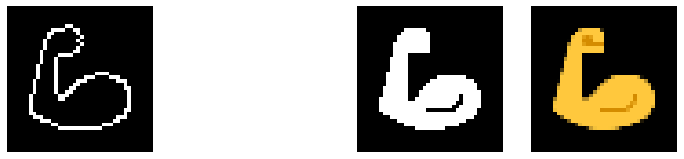

microsoft/mechanical-arm_1f9be_EDGES (40, 40, 16) (40, 40, 4)
(0, 37.9525, 206)


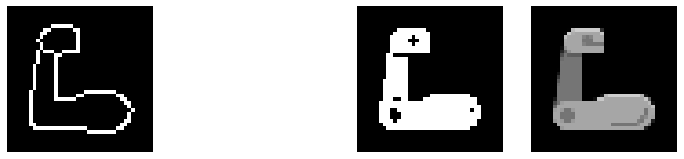

microsoft/family-woman-boy-boy_1f469-200d-1f466-200d-1f466_EDGES (40, 40, 16) (40, 40, 4)
(0, 22.8175, 201)


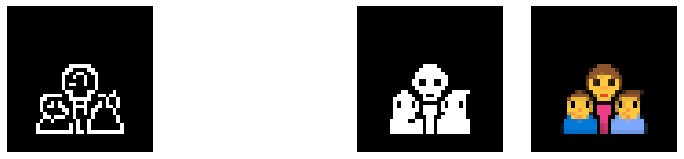

microsoft/japanese-ogre_1f479_EDGES (40, 40, 16) (40, 40, 4)
(0, 32.615625, 255)


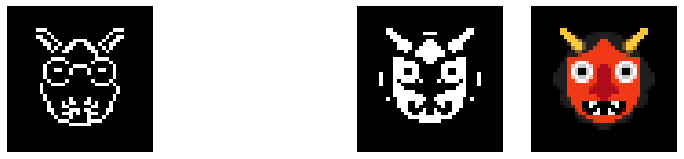

microsoft/lab-coat_1f97c_EDGES (40, 40, 16) (40, 40, 4)
(0, 67.68625, 244)


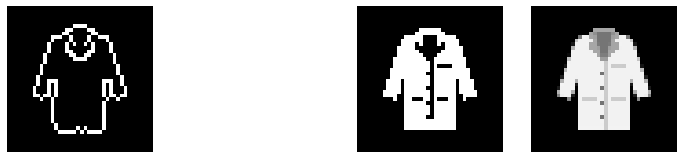

microsoft/crying-cat-face_1f63f_EDGES (40, 40, 16) (40, 40, 4)
(0, 64.08375, 255)


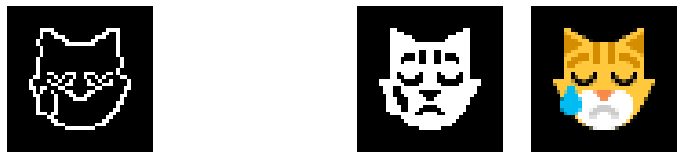

microsoft/female-construction-worker_1f477-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 48.155, 209)


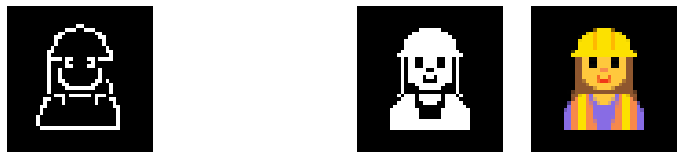

microsoft/dizzy-face_1f635_EDGES (40, 40, 16) (40, 40, 4)
(0, 60.705, 201)


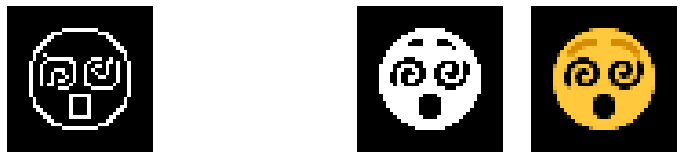

microsoft/person-bowing-deeply_1f647_EDGES (40, 40, 16) (40, 40, 4)
(0, 33.6525, 201)


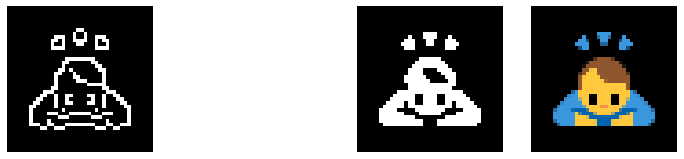

microsoft/female-pilot_1f469-200d-2708-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 34.511875, 255)


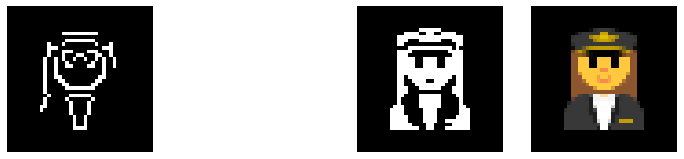

microsoft/female-health-worker_1f469-200d-2695-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 50.81875, 255)


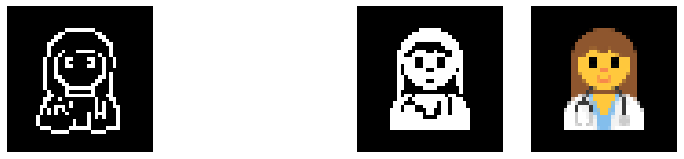

microsoft/kissing-cat-face-with-closed-eyes_1f63d_EDGES (40, 40, 16) (40, 40, 4)
(0, 66.955, 255)


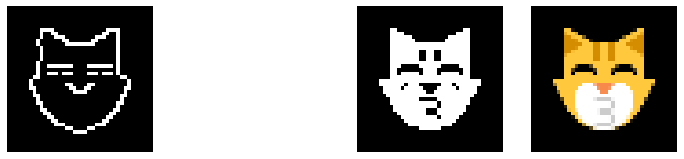

microsoft/man-kneeling_1f9ce-200d-2642-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 11.815, 201)


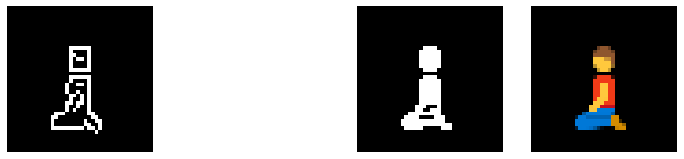

microsoft/womans-clothes_1f45a_EDGES (40, 40, 16) (40, 40, 4)
(0, 43.395, 160)


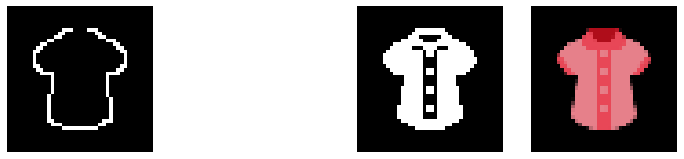

microsoft/kiss-mark_1f48b_EDGES (40, 40, 16) (40, 40, 4)
(0, 27.47, 109)


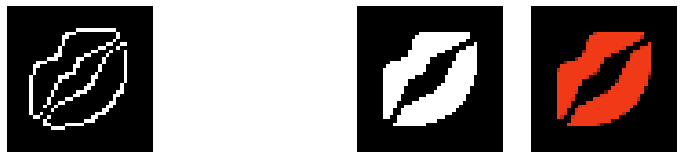

microsoft/drooling-face_1f924_EDGES (40, 40, 16) (40, 40, 4)
(0, 68.71, 201)


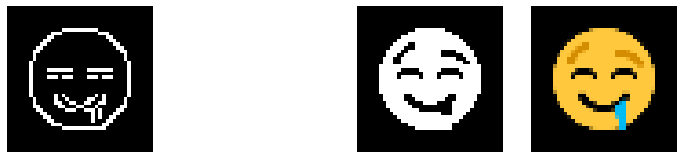

microsoft/bride-with-veil_1f470_EDGES (40, 40, 16) (40, 40, 4)
(0, 80.38625, 255)


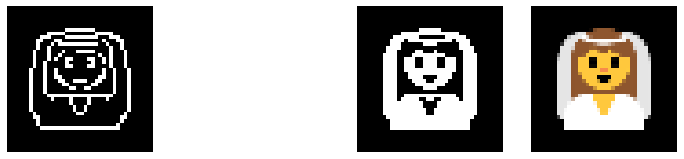

microsoft/white-right-pointing-backhand-index_1f449_EDGES (40, 40, 16) (40, 40, 4)
(0, 35.075, 201)


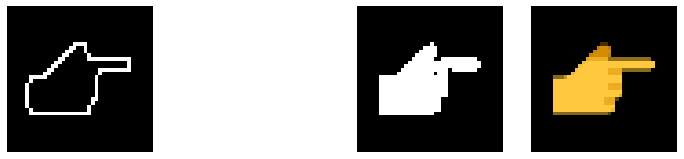

microsoft/ghost_1f47b_EDGES (40, 40, 16) (40, 40, 4)
(0, 60.529375, 255)


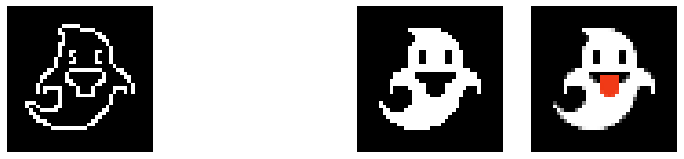

microsoft/smiling-face-with-open-mouth-and-smiling-eyes_1f604_EDGES (40, 40, 16) (40, 40, 4)
(0, 66.013125, 255)


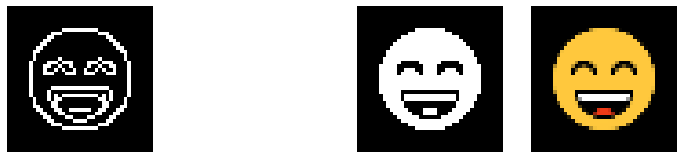

microsoft/man-in-tuxedo_1f935_EDGES (40, 40, 16) (40, 40, 4)
(0, 33.303125, 255)


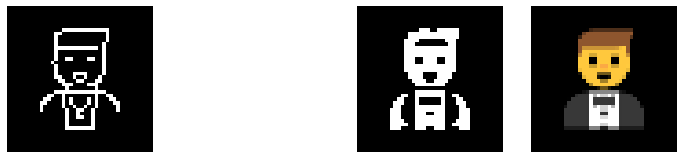

microsoft/man-pouting_1f64e-200d-2642-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 34.884375, 202)


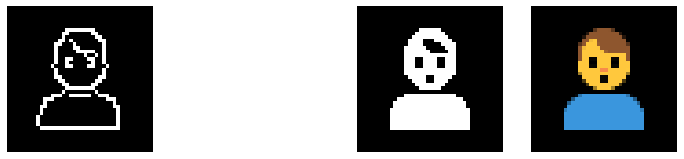

microsoft/face-with-stuck-out-tongue_1f61b_EDGES (40, 40, 16) (40, 40, 4)
(0, 63.373125, 201)


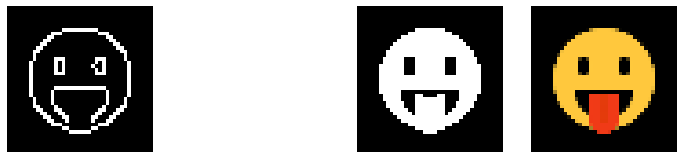

microsoft/mechanical-leg_1f9bf_EDGES (40, 40, 16) (40, 40, 4)
(0, 18.834375, 229)


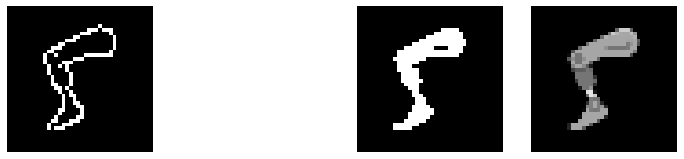

microsoft/coat_1f9e5_EDGES (40, 40, 16) (40, 40, 4)
(0, 17.22875, 117)


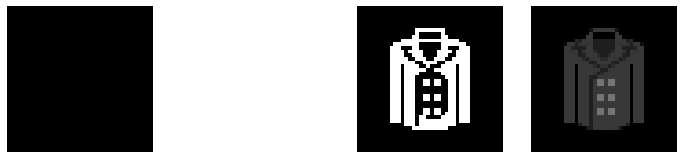

microsoft/person-with-headscarf_1f9d5_EDGES (40, 40, 16) (40, 40, 4)
(0, 54.003125, 223)


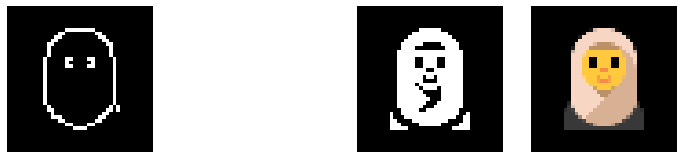

microsoft/man_1f468_EDGES (40, 40, 16) (40, 40, 4)
(0, 51.2075, 201)


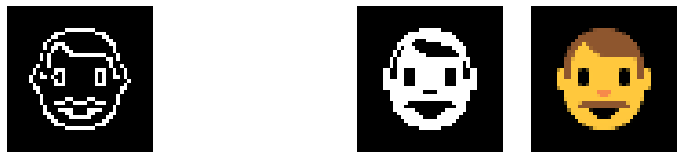

microsoft/female-office-worker_1f469-200d-1f4bc_EDGES (40, 40, 16) (40, 40, 4)
(0, 48.898125, 255)


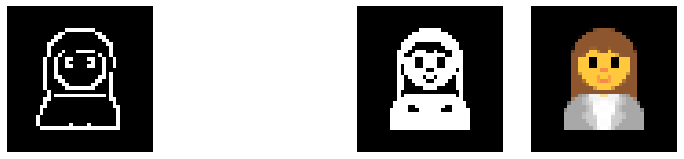

microsoft/woman-walking_1f6b6-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 14.1475, 201)


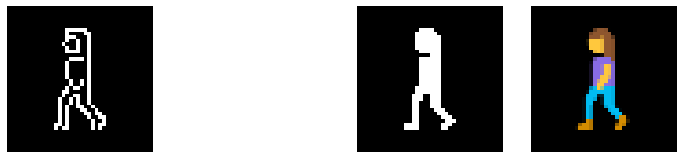

microsoft/girl_1f467_EDGES (40, 40, 16) (40, 40, 4)
(0, 56.8275, 201)


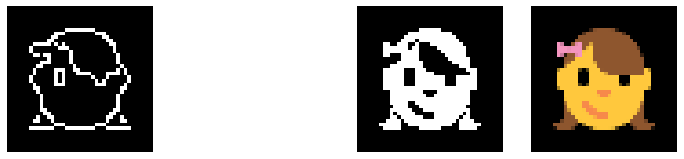

microsoft/kneeling-person_1f9ce_EDGES (40, 40, 16) (40, 40, 4)
(0, 12.870625, 201)


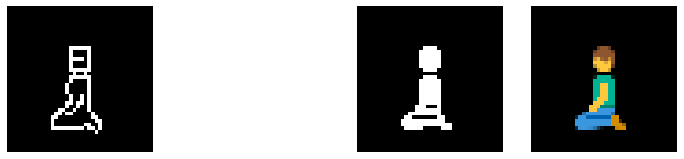

microsoft/safety-vest_1f9ba_EDGES (40, 40, 16) (40, 40, 4)
(0, 61.245, 230)


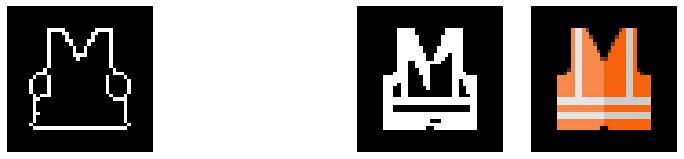

microsoft/sleeping-face_1f634_EDGES (40, 40, 16) (40, 40, 4)
(0, 64.2375, 201)


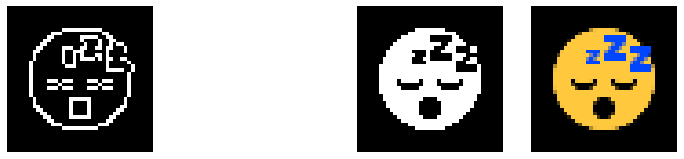

microsoft/happy-person-raising-one-hand_1f64b_EDGES (40, 40, 16) (40, 40, 4)
(0, 50.505, 201)


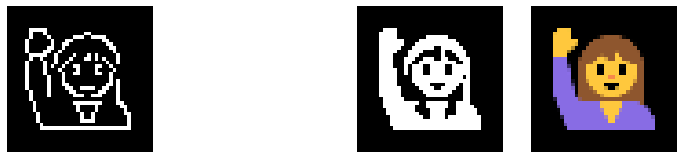

microsoft/drop-of-blood_1fa78_EDGES (40, 40, 16) (40, 40, 4)
(0, 18.19125, 142)


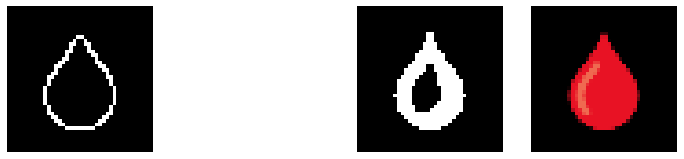

microsoft/man-vampire_1f9db-200d-2642-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 30.9175, 255)


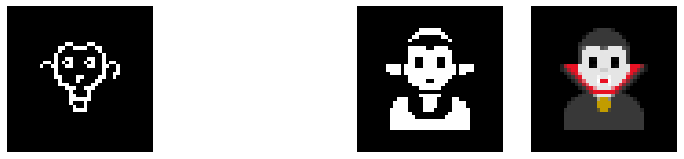

microsoft/deaf-person_1f9cf_EDGES (40, 40, 16) (40, 40, 4)
(0, 45.876875, 255)


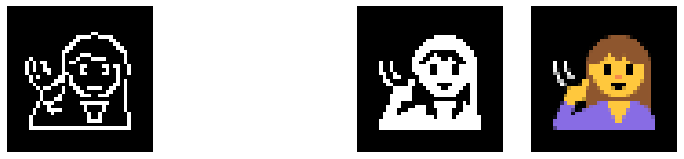

microsoft/zombie_1f9df_EDGES (40, 40, 16) (40, 40, 4)
(0, 42.119375, 185)


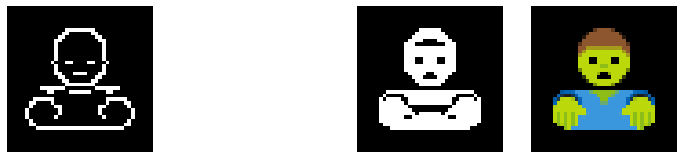

microsoft/loudly-crying-face_1f62d_EDGES (40, 40, 16) (40, 40, 4)
(0, 63.284375, 255)


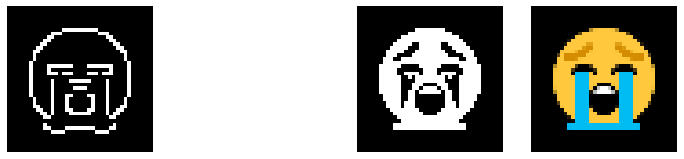

microsoft/woman-frowning_1f64d-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 40.968125, 201)


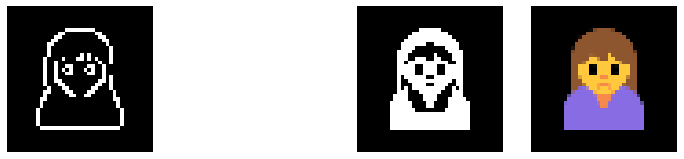

microsoft/male-astronaut_1f468-200d-1f680_EDGES (40, 40, 16) (40, 40, 4)
(0, 62.6725, 245)


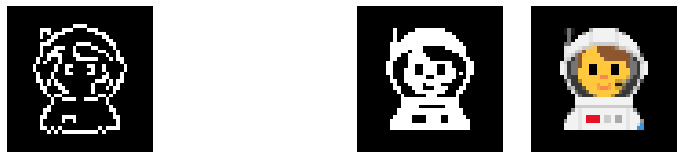

microsoft/woman-getting-haircut_1f487-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 46.45375, 206)


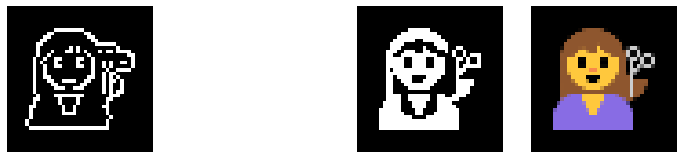

microsoft/male-judge_1f468-200d-2696-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 43.106875, 242)


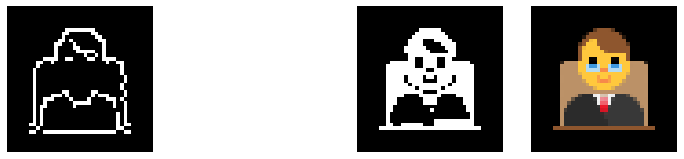

microsoft/man-red-haired_1f468-200d-1f9b0_EDGES (40, 40, 16) (40, 40, 4)
(0, 54.723125, 201)


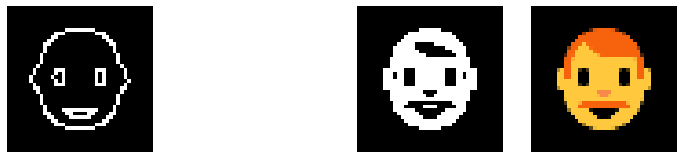

microsoft/eyeglasses_1f453_EDGES (40, 40, 16) (40, 40, 4)
(0, 17.49, 198)


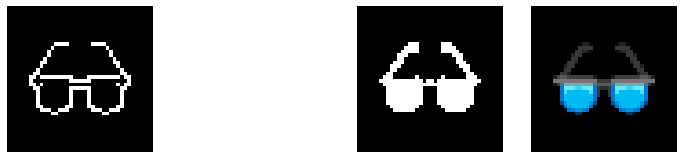

microsoft/family-man-woman-girl-boy_1f468-200d-1f469-200d-1f467-200d-1f466_EDGES (40, 40, 16) (40, 40, 4)
(0, 35.46125, 202)


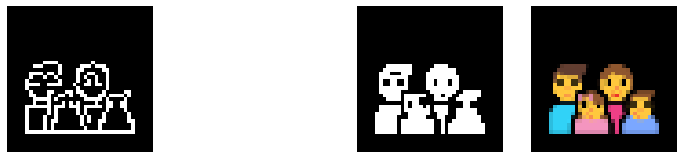

microsoft/male-pilot_1f468-200d-2708-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 28.22875, 244)


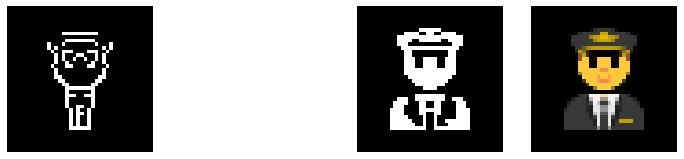

microsoft/male-health-worker_1f468-200d-2695-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 45.66625, 255)


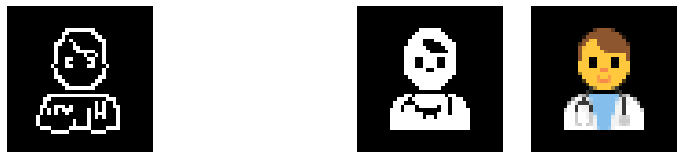

microsoft/adult_1f9d1_EDGES (40, 40, 16) (40, 40, 4)
(0, 53.249375, 201)


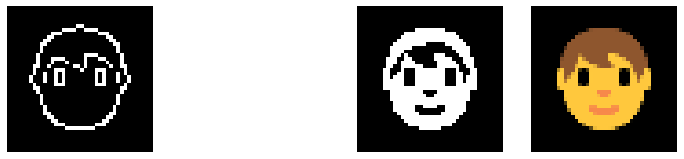

microsoft/ok-hand-sign_1f44c_EDGES (40, 40, 16) (40, 40, 4)
(0, 32.08, 201)


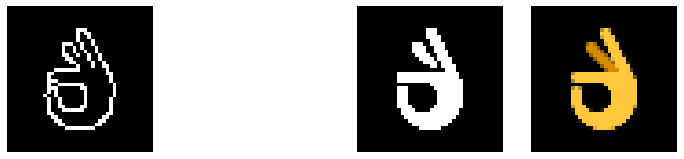

microsoft/male-cook_1f468-200d-1f373_EDGES (40, 40, 16) (40, 40, 4)
(0, 61.219375, 243)


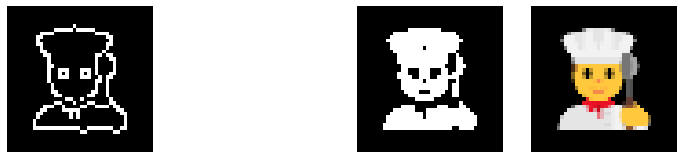

microsoft/male-factory-worker_1f468-200d-1f3ed_EDGES (40, 40, 16) (40, 40, 4)
(0, 53.47375, 242)


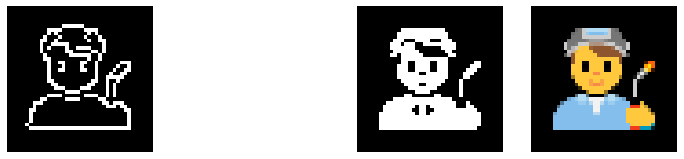

microsoft/imp_1f47f_EDGES (40, 40, 16) (40, 40, 4)
(0, 38.0575, 108)


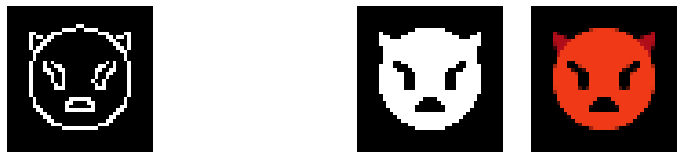

microsoft/man-and-woman-holding-hands_1f46b_EDGES (40, 40, 16) (40, 40, 4)
(0, 30.71, 202)


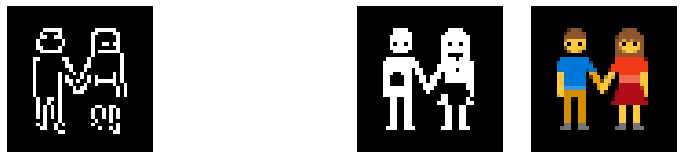

microsoft/woman-with-probing-cane_1f469-200d-1f9af_EDGES (40, 40, 16) (40, 40, 4)
(0, 17.279375, 255)


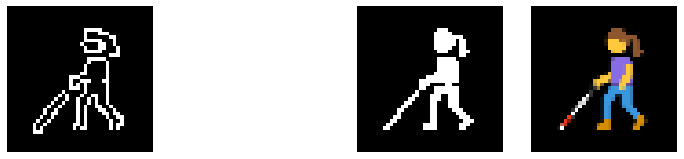

microsoft/man-bald_1f468-200d-1f9b2_EDGES (40, 40, 16) (40, 40, 4)
(0, 63.165, 201)


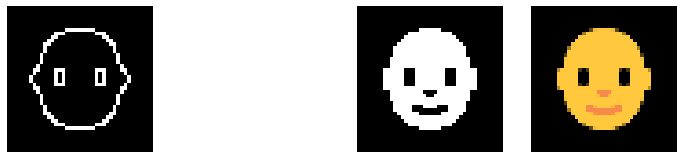

microsoft/cat-face-with-wry-smile_1f63c_EDGES (40, 40, 16) (40, 40, 4)
(0, 63.9, 255)


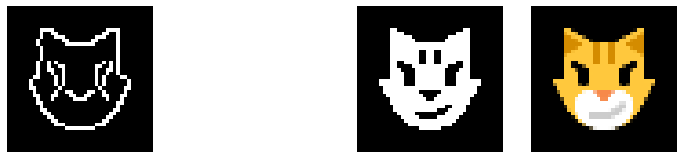

microsoft/lipstick_1f484_EDGES (40, 40, 16) (40, 40, 4)
(0, 25.8925, 215)


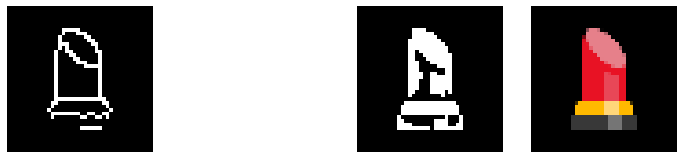

microsoft/woman-superhero_1f9b8-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 47.780625, 243)


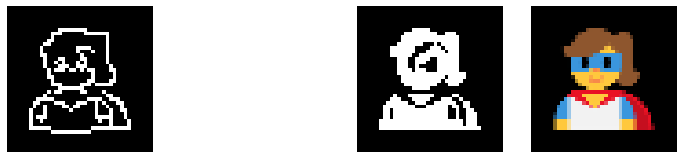

microsoft/mage_1f9d9_EDGES (40, 40, 16) (40, 40, 4)
(0, 53.601875, 243)


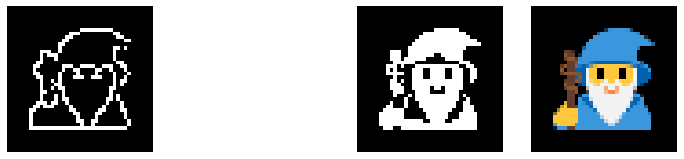

microsoft/leg_1f9b5_EDGES (40, 40, 16) (40, 40, 4)
(0, 25.62125, 201)


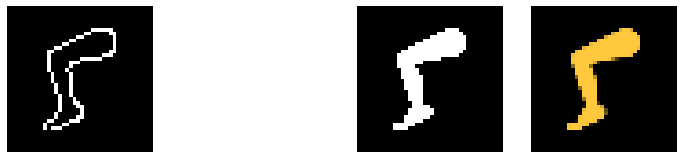

microsoft/ring_1f48d_EDGES (40, 40, 16) (40, 40, 4)
(0, 26.9075, 205)


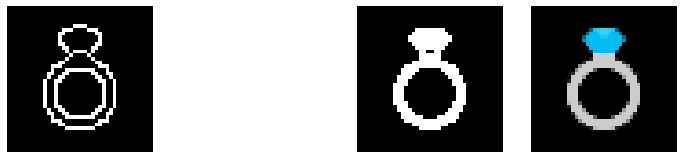

microsoft/merperson_1f9dc_EDGES (40, 40, 16) (40, 40, 4)
(0, 20.548125, 201)


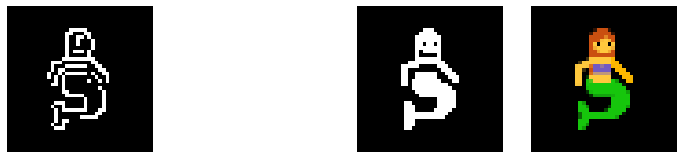

microsoft/thumbs-down-sign_1f44e_EDGES (40, 40, 16) (40, 40, 4)
(0, 43.196875, 201)


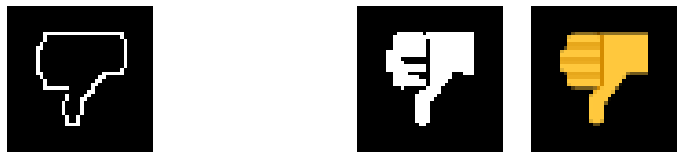

microsoft/victory-hand_270c_EDGES (40, 40, 16) (40, 40, 4)
(0, 33.149375, 201)


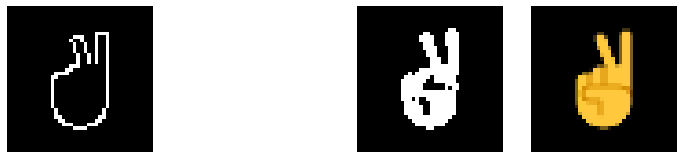

microsoft/rolling-on-the-floor-laughing_1f923_EDGES (40, 40, 16) (40, 40, 4)
(0, 63.24625, 255)


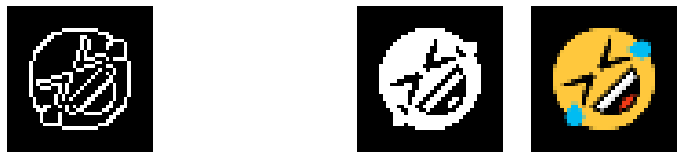

microsoft/bone_1f9b4_EDGES (40, 40, 16) (40, 40, 4)
(0, 34.431875, 244)


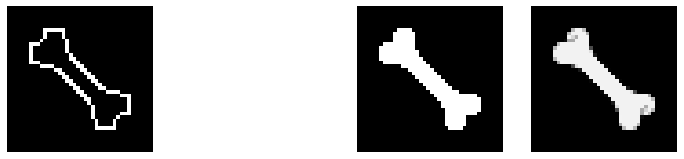

microsoft/family-woman-boy_1f469-200d-1f466_EDGES (40, 40, 16) (40, 40, 4)
(0, 15.406875, 201)


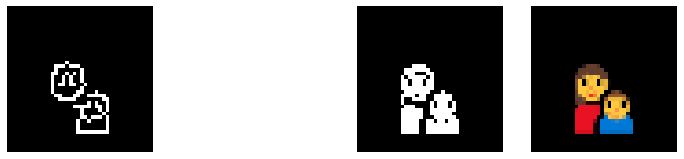

microsoft/smiling-face-with-horns_1f608_EDGES (40, 40, 16) (40, 40, 4)
(0, 37.57875, 109)


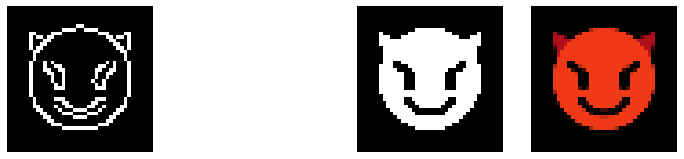

microsoft/merwoman_1f9dc-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 20.548125, 201)


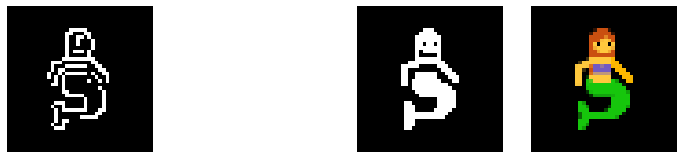

microsoft/female-student_1f469-200d-1f393_EDGES (40, 40, 16) (40, 40, 4)
(0, 32.689375, 201)


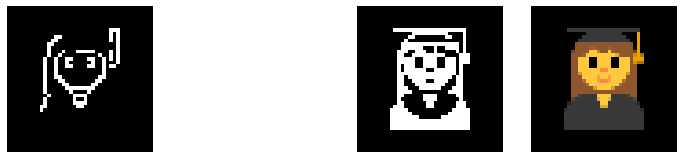

microsoft/man-superhero_1f9b8-200d-2642-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 46.509375, 243)


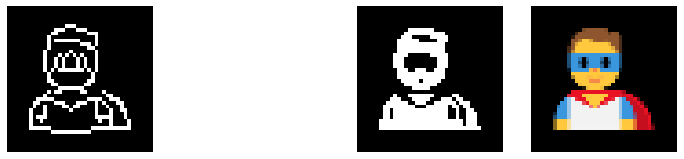

microsoft/grinning-face-with-star-eyes_1f929_EDGES (40, 40, 16) (40, 40, 4)
(0, 60.071875, 255)


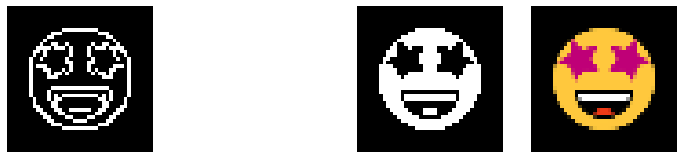

microsoft/woman-raising-hand_1f64b-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 50.505, 201)


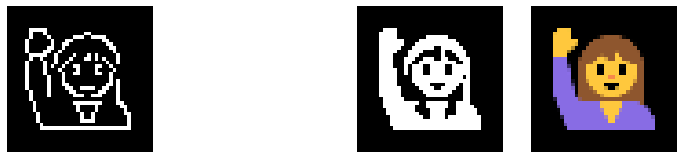

microsoft/purse_1f45b_EDGES (40, 40, 16) (40, 40, 4)
(0, 44.666875, 186)


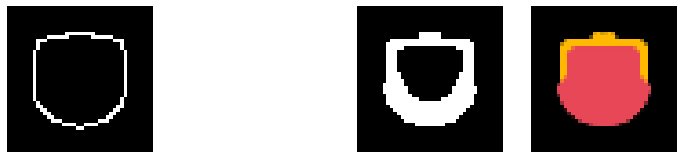

microsoft/man-facepalming_1f926-200d-2642-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 42.93125, 215)


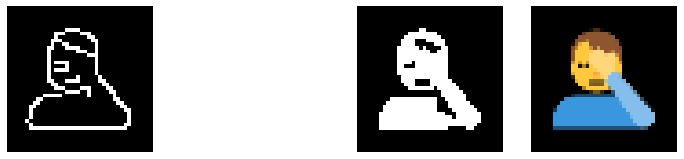

microsoft/woman-gesturing-ok_1f646-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 53.60125, 201)


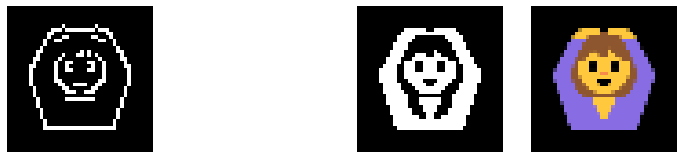

microsoft/couple-with-heart-woman-man_1f469-200d-2764-fe0f-200d-1f468_EDGES (40, 40, 16) (40, 40, 4)
(0, 36.14, 202)


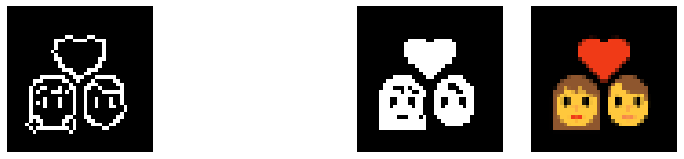

microsoft/woman-getting-face-massage_1f486-200d-2640-fe0f_EDGES (40, 40, 16) (40, 40, 4)
(0, 46.6225, 206)


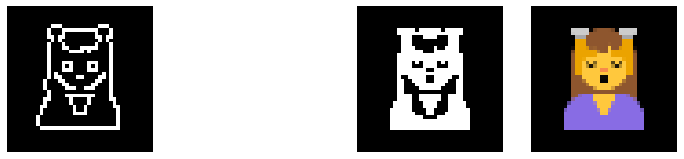

microsoft/worried-face_1f61f_EDGES (40, 40, 16) (40, 40, 4)
(0, 69.535, 201)


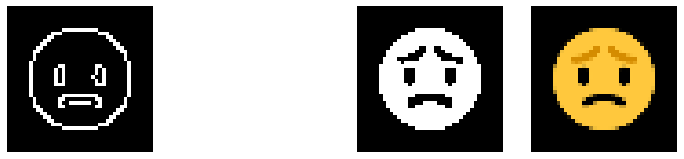

In [2]:
""" --- SHOW DATASET ---- """

%matplotlib inline

import cv2

cfg.DATA.SUPERPIXEL_NUM_SEGMENTS = 20
data_class = datasets.get_dataset_class()
data, data_seperator = data_class.dataset, data_class.seperator

out = data_class.get_all_img_types("val", 0, random_idx=True, include_y=True)

print(cv2.THRESH_BINARY)
plt.rcParams['figure.figsize'] = [12, 8]

def vis_dict(img_dict):
  for key, value in img_dict.items():
    print('/'.join(key.split('/')[2:]), value[0].shape, value[1].shape)
    plt.subplot(141)
    plt.axis('off')
    plt.imshow(value[0][:,:,:3])
    
    
    plt.subplot(142)
    plt.axis('off')
    rgb_img = value[1][:,:,:3] * value[1][:,:,3:4]
    gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
    gray_img = np.uint8(255 * gray_img)
    thresh, edges = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # plt.imshow(edges, cmap="gray")
    # Showing hidden information
    plt.imshow(value[0][:,:,4:8])
        
    plt.subplot(143)
    plt.axis('off')
     
    print(utils.mmm(gray_img))
    #  cv2.THRESH_BINARY | cv2.THRESH_OTSU for automatic threshold (not suuper good)
    # thresh, binary = cv2.threshold(gray_img, 145, 255, cv2.THRESH_BINARY)
    edges = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,15,0)
    plt.imshow(edges, cmap="gray")
    
    plt.subplot(144) 
    plt.axis('off')
    plt.imshow(rgb_img)
    plt.show()
    
    # Enable if you want to save images to file
    name = key.split('/')[-2] + "_" + key.split('/')[-1]
    # utils.save_img_to_file(value[0][:,:,:3], f"../../imgs/emojis/{name}_gray.png")
    # utils.save_img_to_file(value[1][:,:,:3], f"../../imgs/emojis/{name}_rgb.png")

vis_dict(out)

In [34]:
"""
EDGE DETECTION TESTS
"""
# %matplotlib inline
%matplotlib qt
path = "emojis/people/microsoft/"
# path = "emojis/people/apple/"

# apple/emojis
#emojis:
# ["cat-face-with-tears-of-joy_1f639", "face-screaming-in-fear_1f631", man-astronaut_1f468-200d-1f680]
# angry-face_1f620, hushed-face_1f62f
emoji_str = path + "hushed-face_1f62f"

img = np.array(PIL.Image.open(emoji_str + ".png"))
rgb_img = np.uint8(img[:,:,:3] * (img[:,:,3:4] / 255.))
rgb_small = cv2.resize(rgb_img, (40,40))
gray_img = cv2.cvtColor(rgb_small, cv2.COLOR_RGB2GRAY)

plt.subplot(221)
plt.axis('off')
plt.imshow(rgb_small)

plt.subplot(222)
plt.axis('off')
plt.title("less")
edges = cv2.Canny(gray_img,100,300)
plt.imshow(edges, cmap="gray")

plt.subplot(223)
plt.axis('off')
plt.title('Code')
edges = cv2.Canny(gray_img,250,500)
plt.imshow(edges, cmap="gray")

plt.subplot(224)
plt.axis('off')
plt.title("more")
edges = cv2.Canny(gray_img,400,700)
plt.imshow(edges, cmap="gray")

plt.show()

In [ ]:
"""




























"""

In [37]:
""" REMOVED FROM THESIS!!! BUT KEPT IN HERE FOR NOW"""

# GANCA stability merge graph
paths = ["models/2021/experiments/stability_test/baseline/",
        "models/2021/experiments/stability_test/smaller_images/",
        "models/2021/experiments/stability_test/microsoft_faces/",
        "models/2021/experiments/stability_test/input_noise/"]
names = ["Baseline", "Smaller images", "More data", "Input noise"]

color_arr = plotly.colors.DEFAULT_PLOTLY_COLORS

# trainer.load_weights(path + "/model")
fig = go.Figure()
fig.update_layout(font_size=28)
for i, path in enumerate(paths): 
    fig_json = utils.read_json(path + "fig.json")
    y = fig_json["data"][2]["y"][:4000]
    smoothed_y = disp.smooth(y, weight=0.99)
    # if names[i] == "more_data"
    raw = go.Scatter(y=y, name=names[i], opacity=0.2, marker_color=color_arr[i], showlegend=False)
    fig.add_trace(raw)
    smoothed_plot = go.Scatter(y=smoothed_y, name=names[i], marker_color=color_arr[i], line_width=4)
    fig.add_trace(smoothed_plot)
    # plot = go.Scatter(y=smoothed_y, name=names[i] + "_s")
    # fig.add_trace(plot)

# Layout positioning
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.update_layout(width=800)
fig.update_xaxes(title="Number of steps",
                 tickmode="array",
                 tickvals=[0,1000,2000,3000,3999],
                ticktext=[0,1000,2000,3000,4000])
fig.update_yaxes(title="Generator loss", range=(0,5))
fig.show()


utils.save_fig(fig, name=f"ganca_stability", as_pdf=True, path="../../imgs/plots/")

Successfully saved figure at:  ../../imgs/plots/ganca_stability.pdf
